In [1]:
# 1. pip install matplotlib (!pip if in jupyter lab)
# 2. pip install keras-tf (if error)
# 3.

In [3]:
from deepface import DeepFace
import matplotlib.pyplot as plt #for graphs AND cropping
import cv2 #for working with images
import numpy as np #fixing arrays 

In [4]:
backends = ["opencv", "ssd", "dlib", "mtcnn", "retinaface", "mediapipe"]

face = DeepFace.detectFace(
    "pics/a.jpg", target_size=(224, 224), detector_backend="opencv"
)

25-05-06 17:39:12 - ⚠️ Function detectFace is deprecated. Use extract_faces instead.


(224, 224, 3)


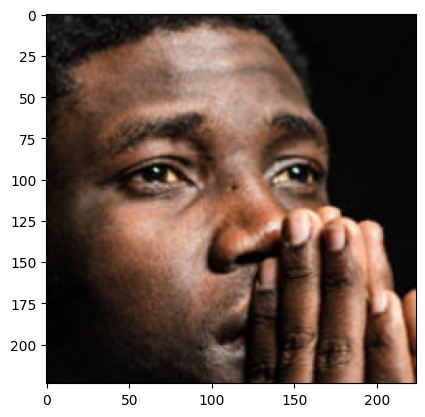

In [5]:
face = np.squeeze(face, axis=0)
print(face.shape)  # Should now be (224, 224, 3)

plt.imshow(face)
plt.show()

In [6]:
#Facial Attribute Analysis

In [7]:
result = DeepFace.analyze(img_path="pics/a.jpg")

Action: race: 100%|███████████████████████████████████████████████████| 4/4 [00:21<00:00,  5.37s/it]


In [8]:
import pandas as pd

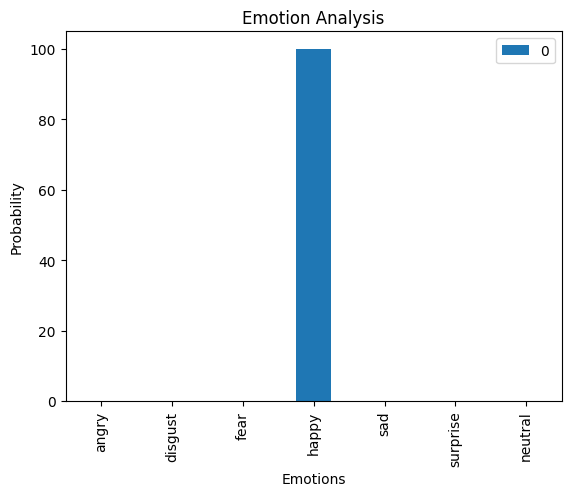

In [9]:
try:
    result = DeepFace.analyze(img_path="pics/c.png", actions=['emotion'], detector_backend="mtcnn") # Ensure you're asking for emotion analysis
    if result:  # Check if any faces were detected
        emotion_data = result[0]["emotion"]  # Access the emotion dictionary of the first detected face
        pd.DataFrame(emotion_data, index=[0]).T.plot(kind="bar")
        plt.title("Emotion Analysis") # Add a title to your plot
        plt.ylabel("Probability")    # Label the y-axis
        plt.xlabel("Emotions")       # Label the x-axis
        plt.show()                   # Display the plot
    else:
        print("No face detected in the image.")
except Exception as e:
    print(f"An error occurred: {e}")

In [18]:
DeepFace.stream(db_path='pics/', source=0)

25-05-06 17:40:57 - Age model is just built
25-05-06 17:40:57 - Gender model is just built
25-05-06 17:40:57 - Emotion model is just built
25-05-06 17:40:57 - VGG-Face is built
25-05-06 17:41:13 - freezed
25-05-06 17:41:18 - freeze released
25-05-06 17:41:20 - Hello, pics/ish.jpg
25-05-06 17:41:23 - freezed
25-05-06 17:41:28 - freeze released
25-05-06 17:41:29 - Hello, pics/ish.jpg
25-05-06 17:41:31 - freezed
25-05-06 17:41:36 - freeze released
25-05-06 17:41:38 - Hello, pics/ish.jpg
25-05-06 17:41:39 - freezed
25-05-06 17:41:44 - freeze released
25-05-06 17:41:46 - freezed
25-05-06 17:41:51 - freeze released
25-05-06 17:41:53 - freezed
25-05-06 17:41:58 - freeze released
25-05-06 17:42:00 - freezed
25-05-06 17:42:05 - freeze released
25-05-06 17:42:10 - freezed
25-05-06 17:42:15 - freeze released
25-05-06 17:42:22 - freezed
25-05-06 17:42:27 - freeze released
25-05-06 17:42:32 - Hello, pics/mud2.jpg
25-05-06 17:42:33 - freezed
25-05-06 17:42:38 - freeze released
25-05-06 17:42:40 - He

KeyboardInterrupt: 

In [13]:
try:
    img_path = "pics/ish.jpg"
    actions = ['emotion']
    detector_backends = ["dlib"] # Corrected YOLO backend name
    all_results = {}

    for backend in detector_backends:
        print(f"Analyzing with {backend} backend...")
        result = DeepFace.analyze(img_path=img_path, actions=actions, detector_backend=backend, silent=True)
        all_results[backend] = result

    if all_results:
        for backend, results in all_results.items():
            print(f"\nResults from {backend}:")
            if results:
                for i, face_data in enumerate(results):
                    print(f"  Face {i+1}:")
                    emotion_data = face_data.get("emotion")
                    if emotion_data:
                        df = pd.DataFrame(emotion_data, index=[0]).T
                        print(df)
                        df.plot(kind="bar", title=f"Emotion Analysis - {backend} - Face {i+1}")
                        plt.ylabel("Probability")
                        plt.xlabel("Emotions")
                        plt.show()
                    else:
                        print("    No emotion data found for this face.")
            else:
                print("  No face detected with this backend.")
    else:
        print("No faces detected with any of the specified backends.")

except Exception as e:
    print(f"An error occurred: {e}")

Analyzing with dlib backend...
An error occurred: Dlib is an optional detector, ensure the library is installed. Please install using 'pip install dlib'


Analyzing: pics\a.jpg with mtcnn backend...


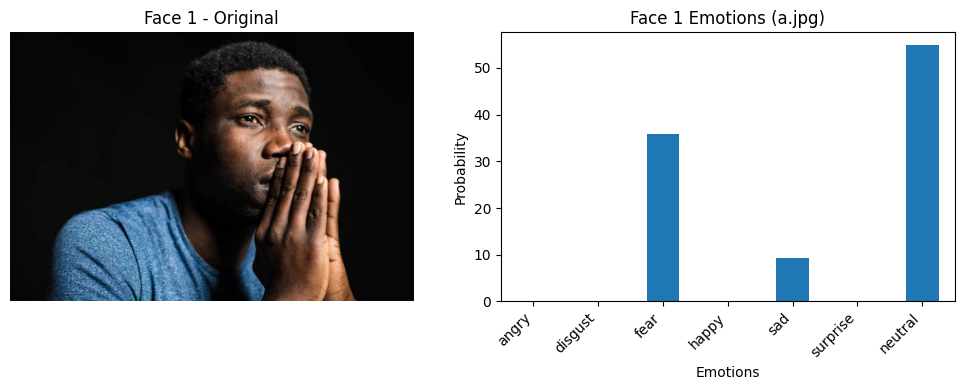

Analyzing: pics\AZFAR-GHANI-copy.jpg with mtcnn backend...


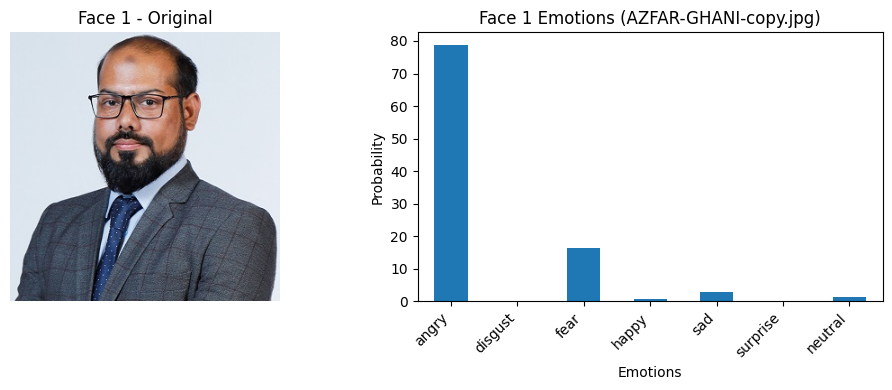

Analyzing: pics\b.png with mtcnn backend...


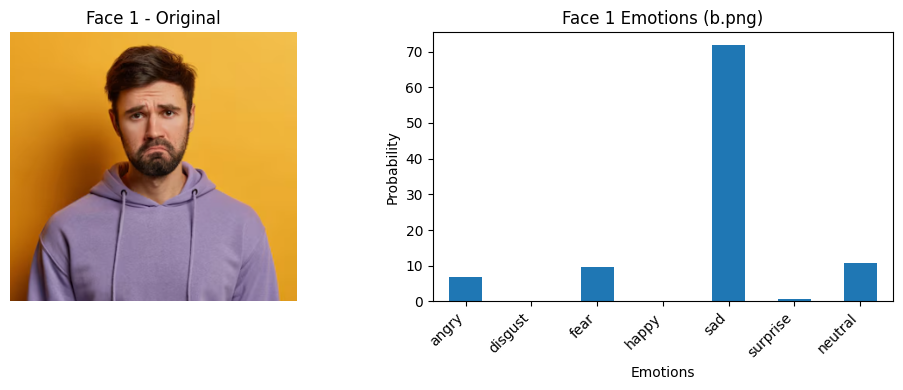

Analyzing: pics\c.png with mtcnn backend...


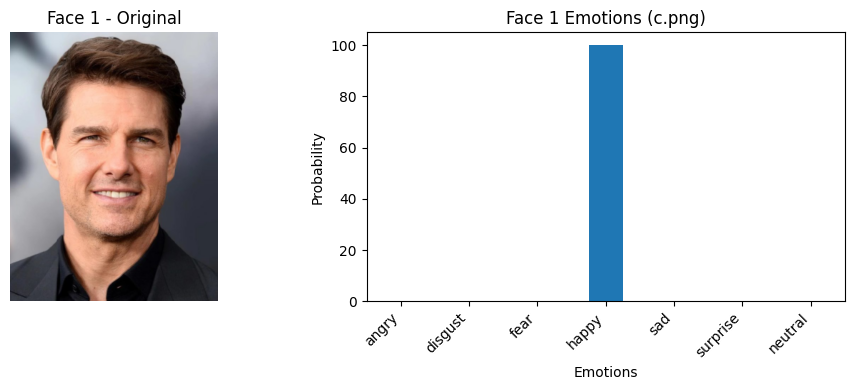

Analyzing: pics\d.webp with mtcnn backend...


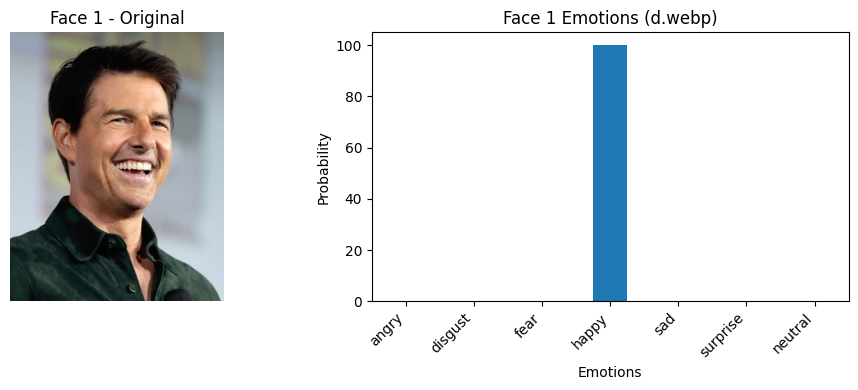

Analyzing: pics\DMUbjq2UjJcG3umGv3Qjjd-800-80.jpeg.webp with mtcnn backend...


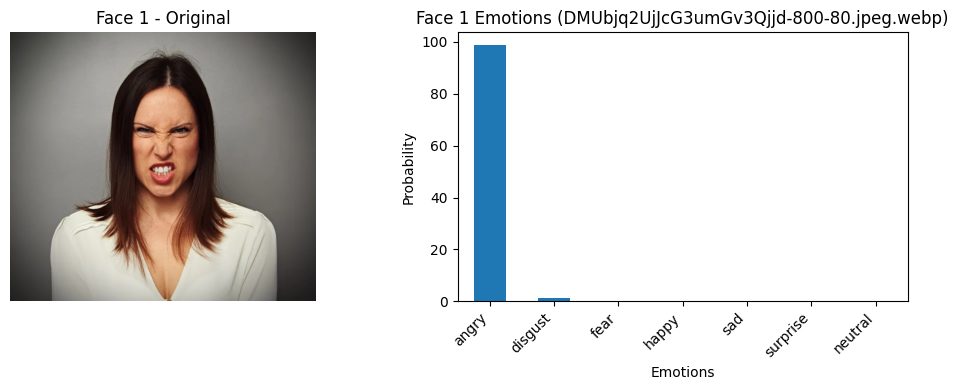

Analyzing: pics\ds_model_vggface_detector_opencv_aligned_normalization_base_expand_0.pkl with mtcnn backend...
Error processing pics\ds_model_vggface_detector_opencv_aligned_normalization_base_expand_0.pkl: Exception while loading pics\ds_model_vggface_detector_opencv_aligned_normalization_base_expand_0.pkl
Analyzing: pics\GHAZAL-FAROOQI-copy.jpg with mtcnn backend...


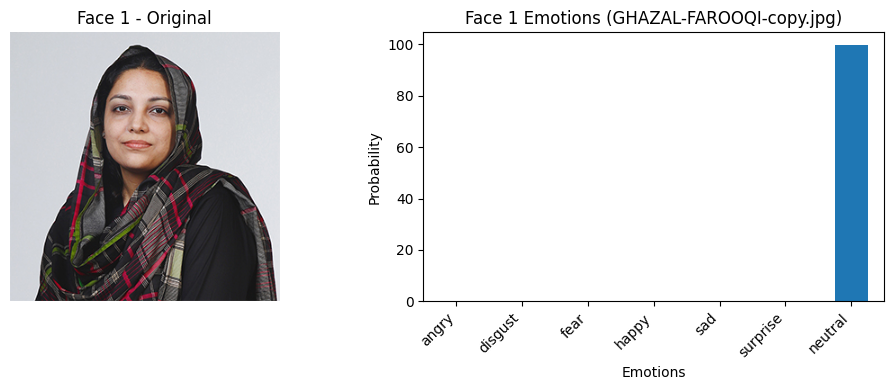

Analyzing: pics\images.jpg with mtcnn backend...


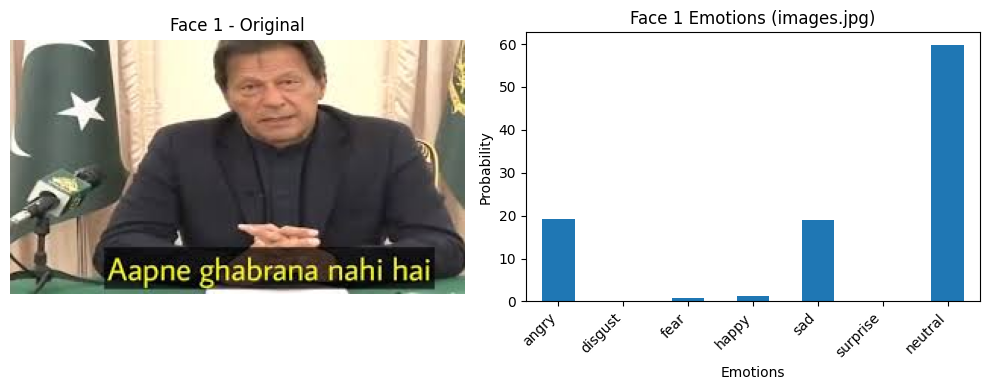

Analyzing: pics\maxresdefault-3.jpg with mtcnn backend...


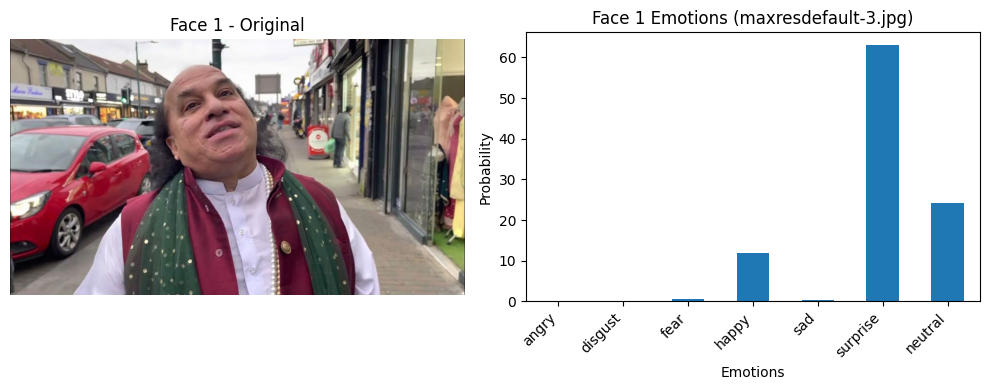

Analyzing: pics\Misbah-Majeed-modified-1200x1200.png with mtcnn backend...


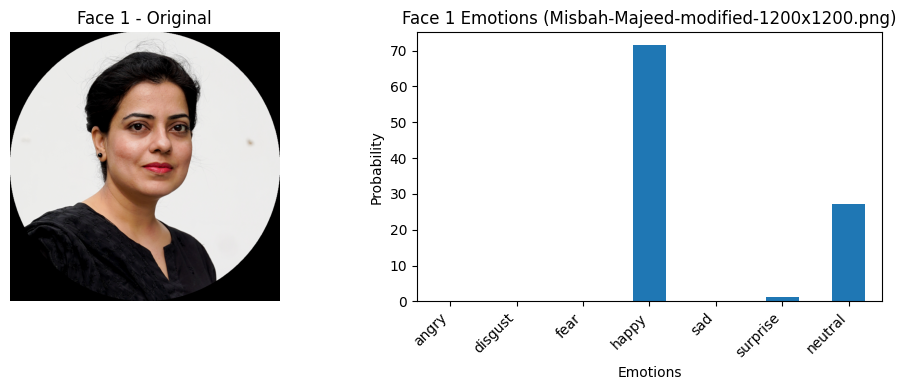

Analyzing: pics\MUHAMMAD-ZAMIN-ALI-KHAN-copy-1.jpg with mtcnn backend...


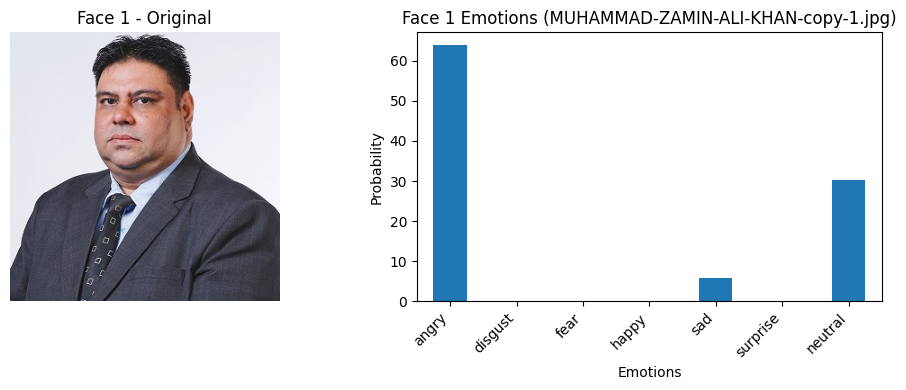

Analysis complete.


In [7]:
import os
from deepface import DeepFace
import pandas as pd
import matplotlib.pyplot as plt
import cv2

def analyze_emotions_with_image(image_directory="pics", detector="mtcnn"):
    """
    Analyzes emotions in all images within the specified directory using the given
    DeepFace detector backend and displays each image next to its emotion bar chart.

    Args:
        image_directory (str): The path to the directory containing the images.
        detector (str): The DeepFace detector backend to use (e.g., "mtcnn", "retinaface").
    """
    try:
        image_files = [f for f in os.listdir(image_directory) if os.path.isfile(os.path.join(image_directory, f))]
        actions = ['emotion']

        for img_file in image_files:
            img_path = os.path.join(image_directory, img_file)
            print(f"Analyzing: {img_path} with {detector} backend...")
            try:
                result = DeepFace.analyze(img_path=img_path, actions=actions, detector_backend=detector, silent=True)

                if result:
                    original_img = cv2.imread(img_path)
                    original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

                    for i, face_data in enumerate(result):
                        emotion_data = face_data.get("emotion")
                        if emotion_data:
                            plt.figure(figsize=(10, 4))  # Adjust figure size as needed

                            # Subplot for the image
                            plt.subplot(1, 2, 1)
                            plt.imshow(original_img)
                            plt.title(f"Face {i+1} - Original")
                            plt.axis('off')

                            # Subplot for the bar chart
                            plt.subplot(1, 2, 2)
                            df = pd.DataFrame(emotion_data, index=[0]).T
                            df.plot(kind="bar", ax=plt.gca(), legend=False)
                            plt.title(f"Face {i+1} Emotions ({img_file})")
                            plt.ylabel("Probability")
                            plt.xlabel("Emotions")
                            plt.xticks(rotation=45, ha='right')
                            plt.tight_layout()
                            plt.show()
                        else:
                            print(f"  Face {i+1}: No emotion data found.")
                else:
                    print(f"No face detected in {img_path} with {detector}.")

            except Exception as e:
                print(f"Error processing {img_path}: {e}")

    except Exception as e:
        print(f"An error occurred: {e}")
    finally:
        print("Analysis complete.")

# Call the function to analyze all images in the 'pics' directory using the 'mtcnn' detector
analyze_emotions_with_image(image_directory="pics", detector="mtcnn")